## Analyze the dataset.

### 1. Load and Display data and Checking for Missing Values

In [3]:
import pandas as pd

# Load your data
df = pd.read_csv("/kaggle/input/d/mennaahmed7m/ml-dataset/loan_train.csv") 

# Preview the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Print number of rows and columns
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   540179     697401      10000        10000           9975.0   36 months   
1   585434     752191      14000        14000          13775.0   36 months   
2   457736     569298       9475         9475           9475.0   36 months   
3   734349     930860       4000         4000           4000.0   36 months   
4  1050080    1281522       3600         3600           3600.0   36 months   

  int_rate  installment grade sub_grade  ... total_pymnt_inv total_rec_prncp  \
0   13.23%       338.05     C        C1  ...        11943.68        10000.00   
1    7.88%       437.94     A        A5  ...        15470.79        14000.00   
2    8.94%       301.04     A        A5  ...        10472.09         9475.00   
3    7.29%       124.04     A        A4  ...         4425.26         4000.00   
4    6.62%       110.54     A        A2  ...         2321.34         2004.17   

  total_rec_int  total_rec_late_fee recoveries col

### 2. Visualize Distributions (Histograms for numerical columns)

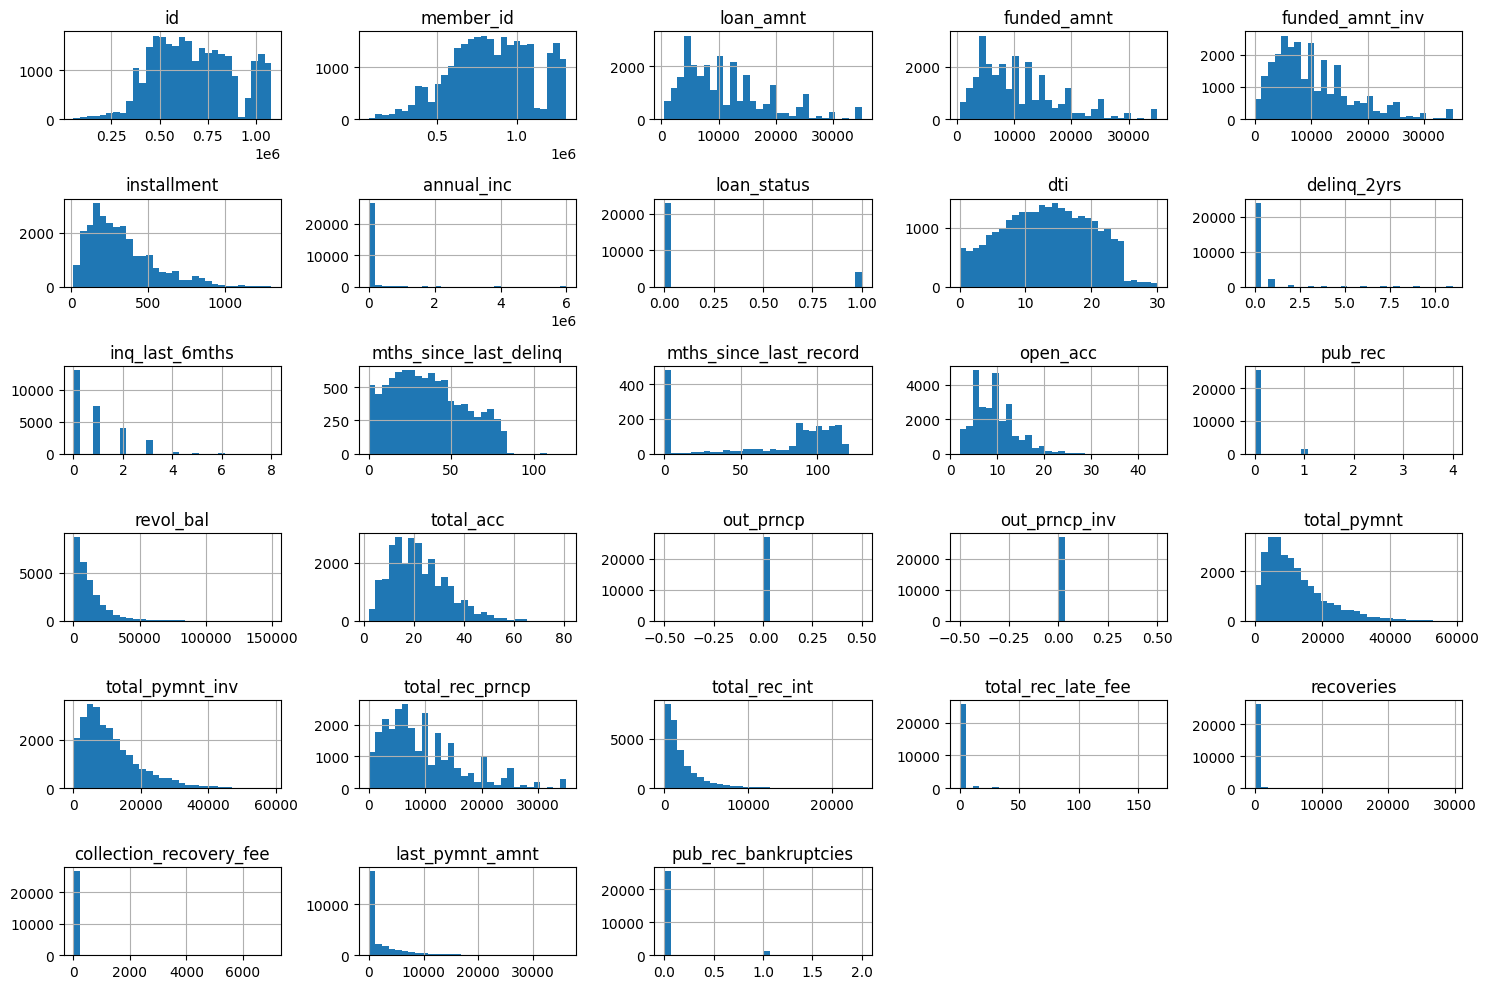

In [4]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### 3. Check Feature Correlations

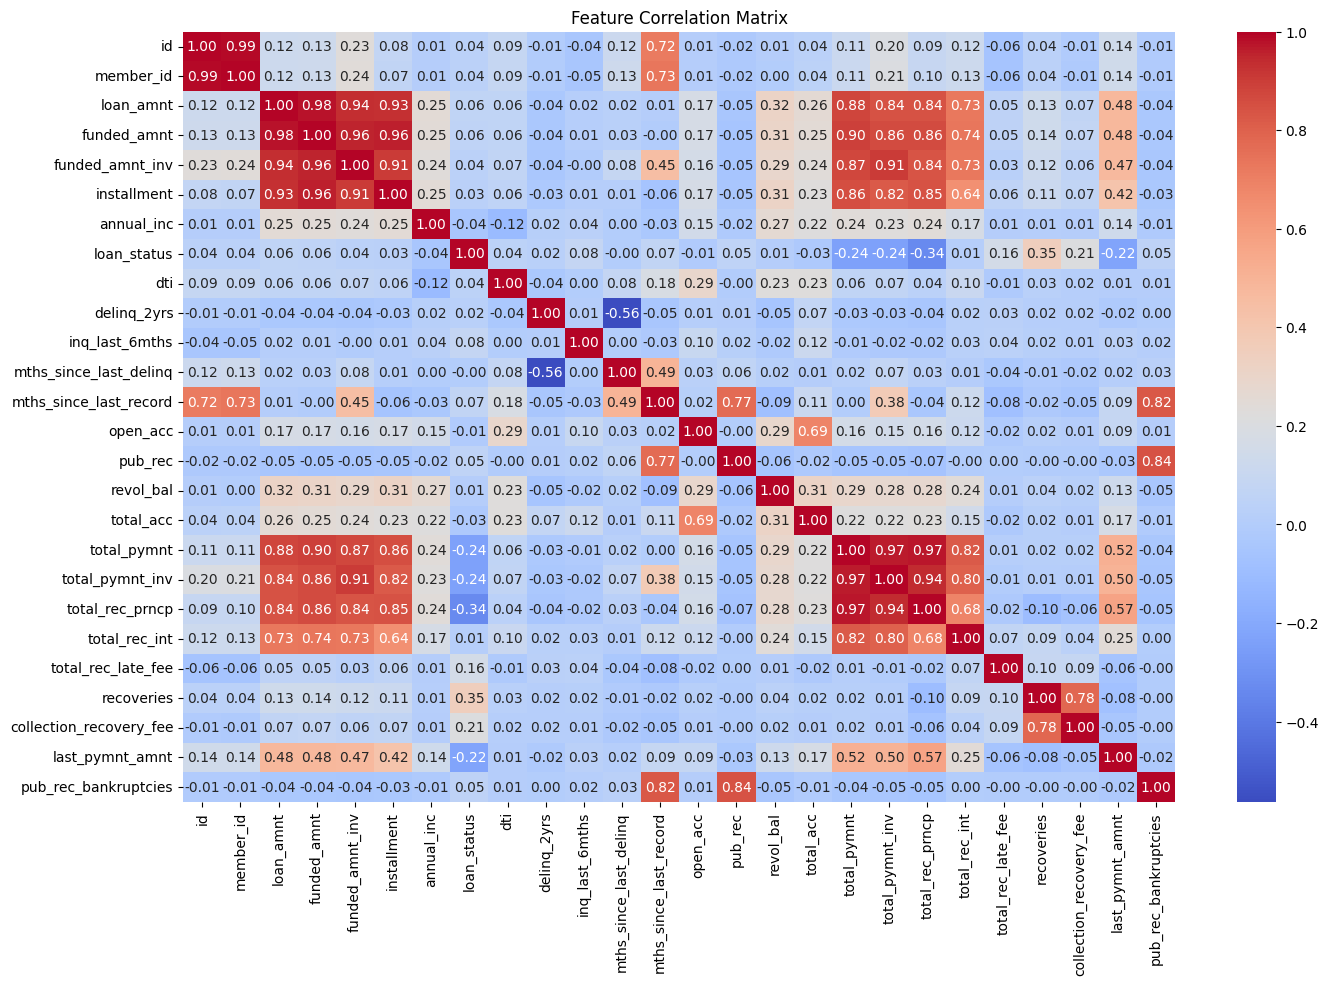

In [5]:
# Select only numeric columns for heatmap
# Columns with the same value across all rows have zero variance, which makes correlation undefined.
df = df.loc[:, df.nunique() > 1]
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

### 4. Look at Random Samples & Outliers

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
20249   969830    1191067      15000        15000          14750.0   
25678  1026867    1256067      25000        25000          25000.0   
20714  1014337    1241917       9450         9450           9450.0   
9675    890232    1106814      15000        15000          14975.0   
9895    628636     805481       2000         2000           1500.0   

             term int_rate  installment grade sub_grade  ... total_pymnt_inv  \
20249   60 months   10.65%       323.53     B        B2  ...        14504.86   
25678   36 months   13.49%       848.27     C        C1  ...        30537.34   
20714   36 months    6.62%       290.15     A        A2  ...        10256.65   
9675    36 months    7.90%       469.36     A        A4  ...        16783.86   
9895    36 months    6.54%        61.34     A        A4  ...         1656.08   

      total_rec_prncp total_rec_int  total_rec_late_fee recoveries  \
20249         9623.34       

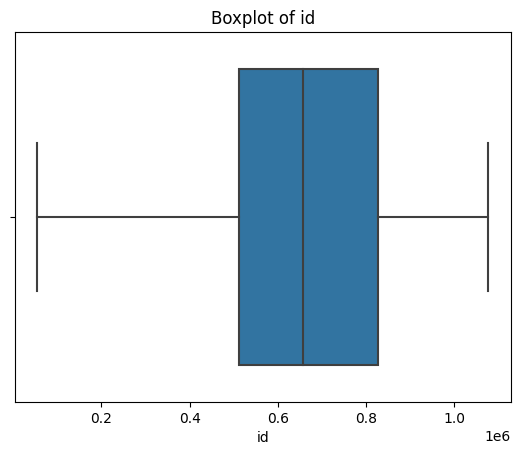

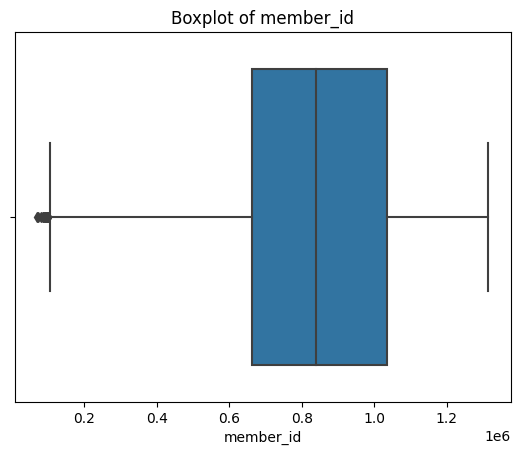

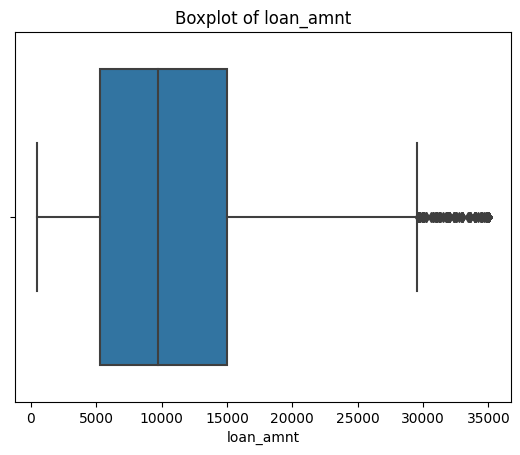

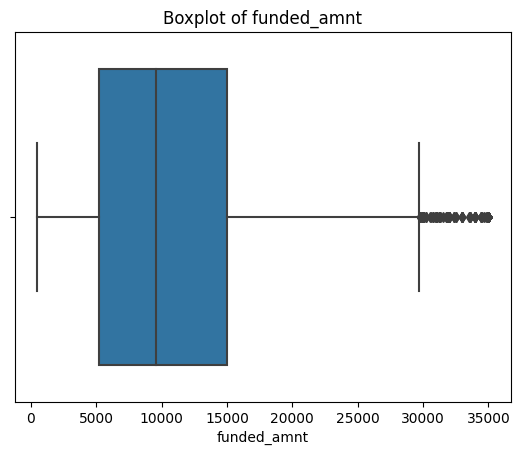

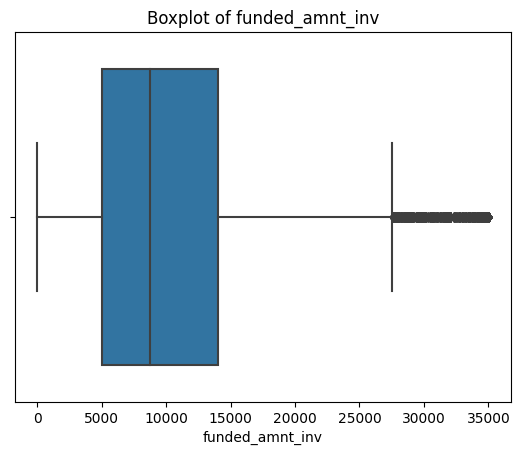

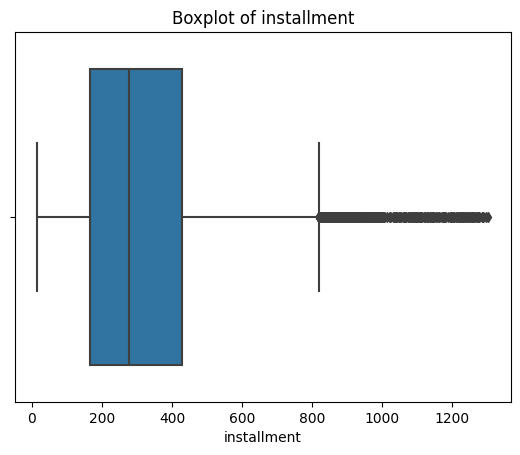

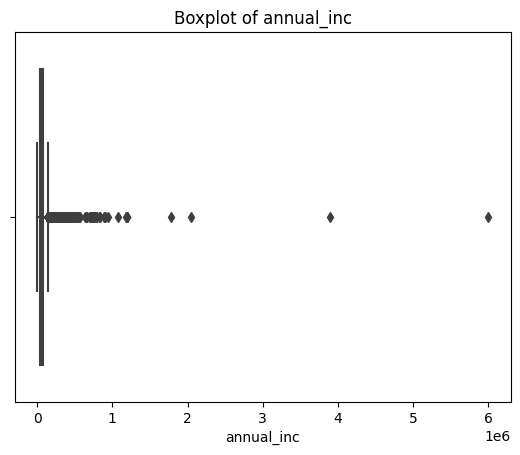

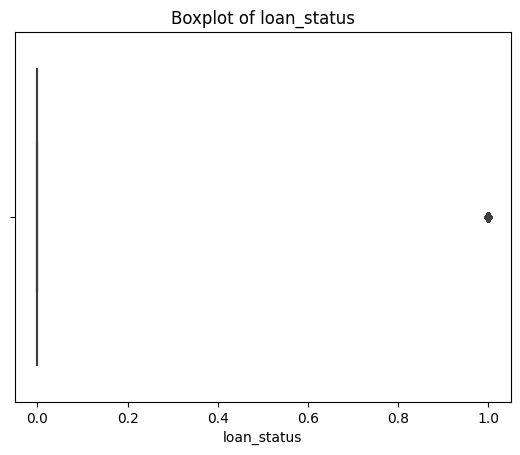

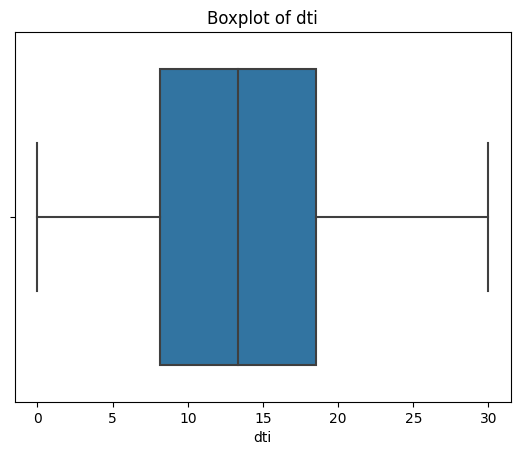

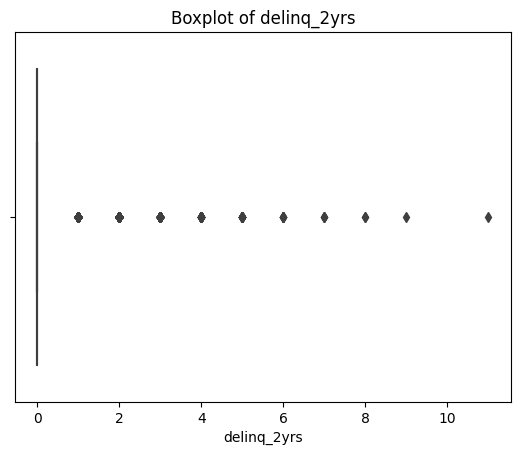

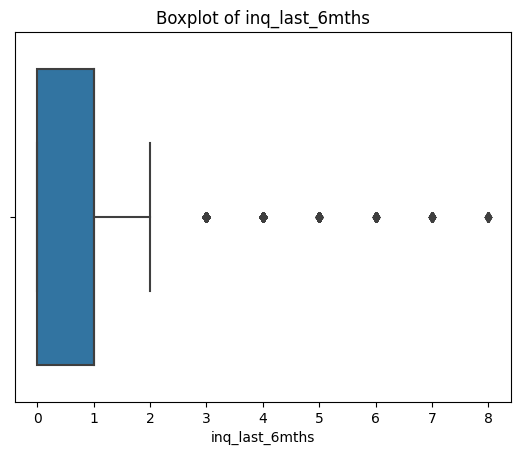

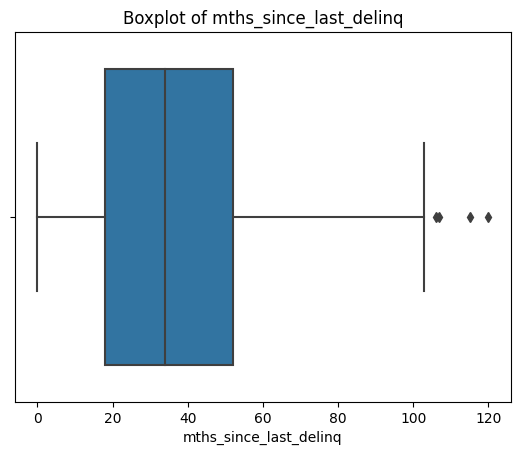

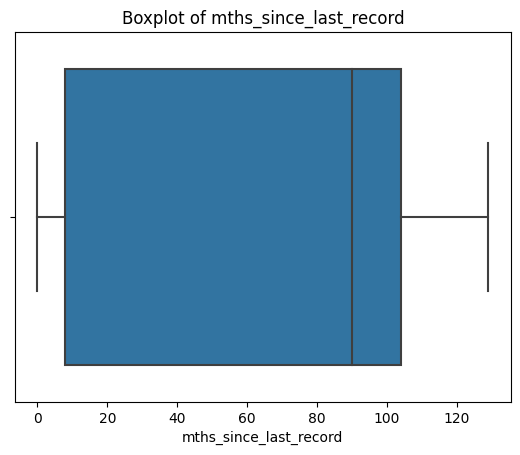

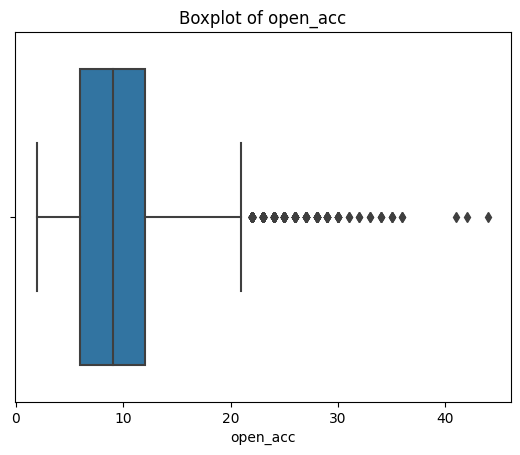

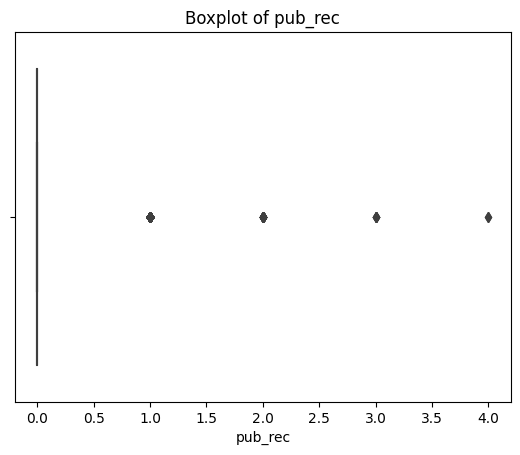

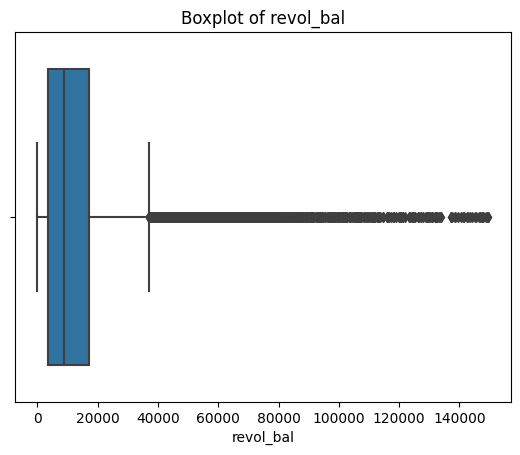

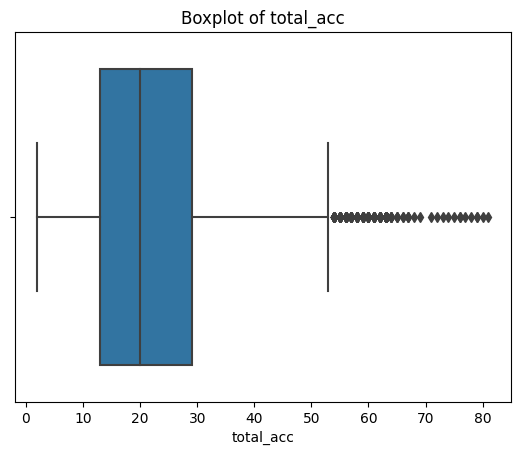

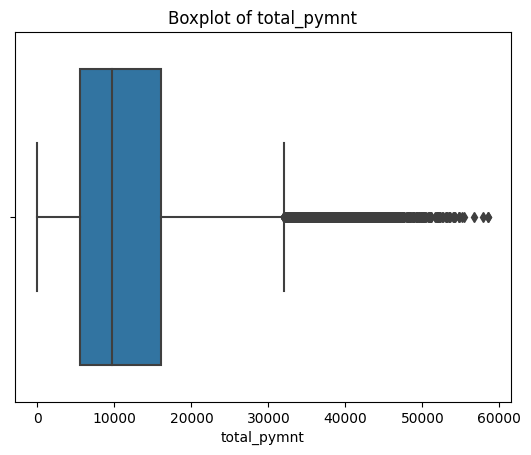

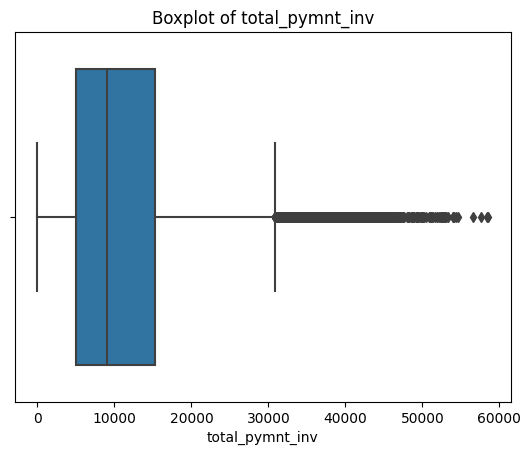

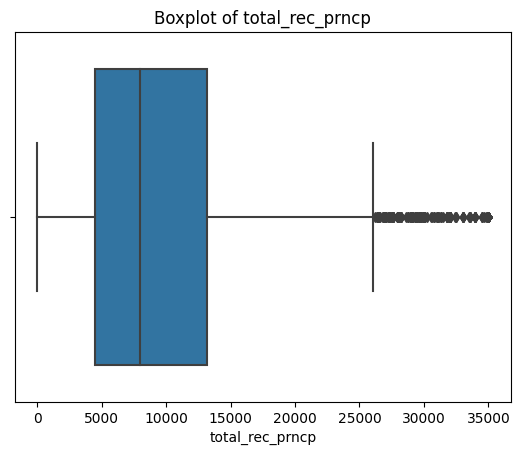

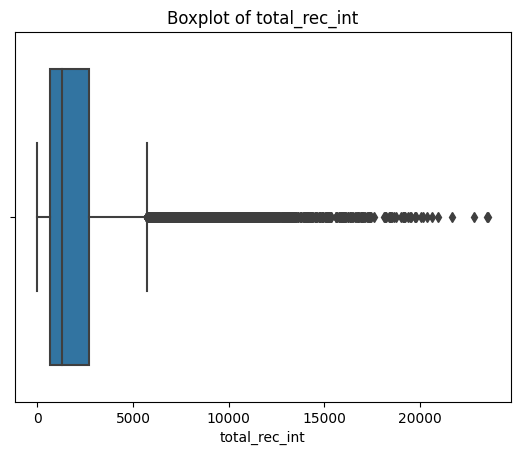

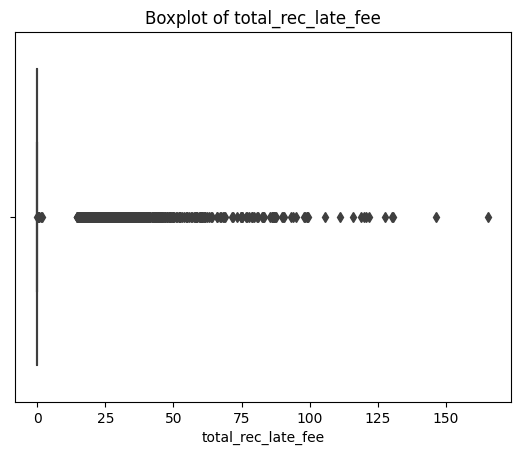

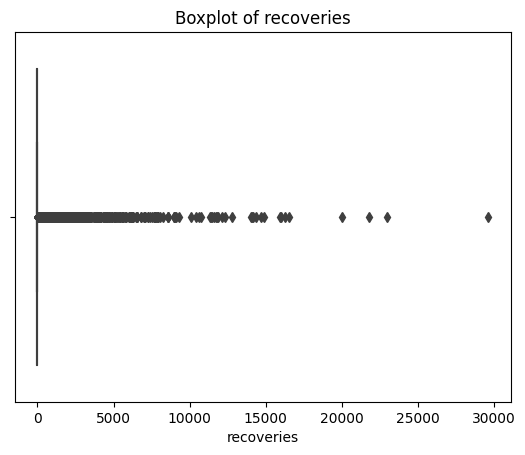

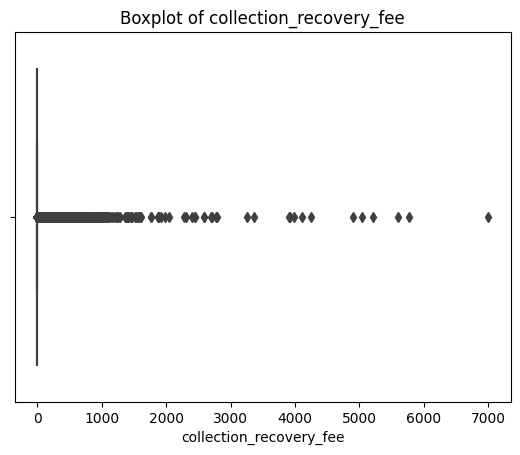

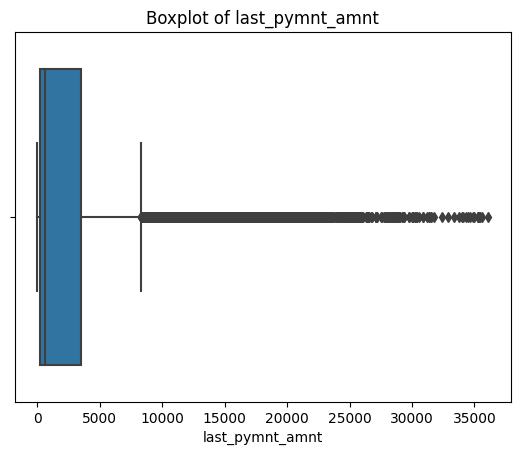

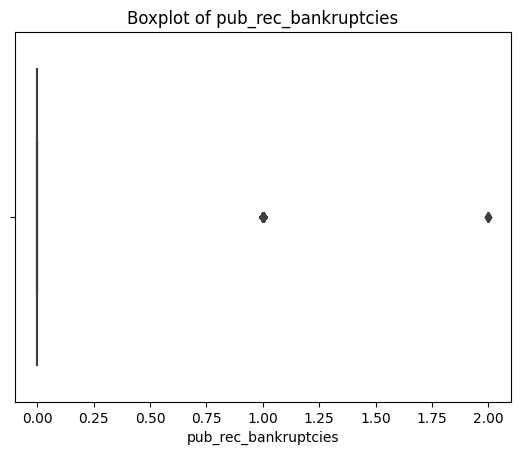

In [6]:
print(df.sample(5))  # Random samples

# Detect outliers in numeric features using boxplots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### 5. Pie Chart for loan status distribution

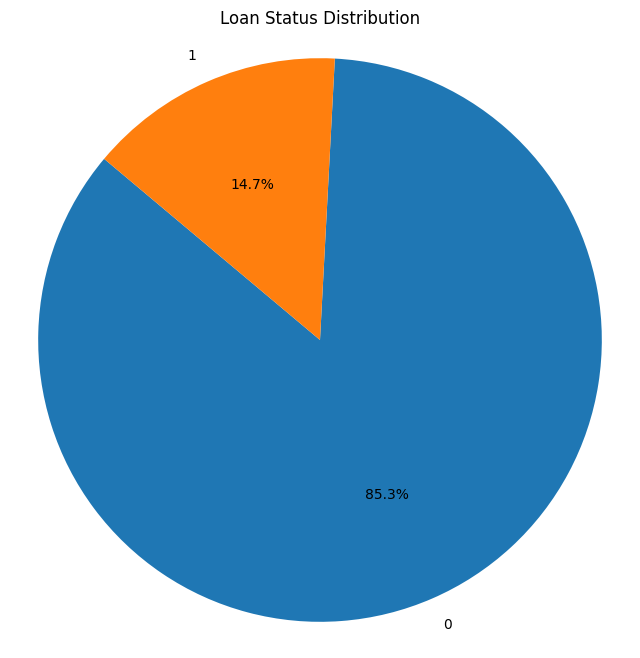

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
loan_status_counts = df['loan_status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()

### 6. Use a Baseline Model (e.g., ZeroR)
* ZeroR is a rule-based model that predicts the most frequent class (classification)

In [8]:
# The warnings occur because some classes in your target variable loan_status are not being predicted at all by your dummy classifiers, 
# making precision and F-score metrics undefined for those classes.

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
target='loan_status'

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

strategies = {
    "ZeroR (most_frequent)": DummyClassifier(strategy='most_frequent'),
    "prior": DummyClassifier(strategy='prior'),
    "uniform": DummyClassifier(strategy='uniform'),
    "constant_0": DummyClassifier(strategy='constant', constant=0),  # Change '0' as needed
}

for name, dummy in strategies.items():
    dummy.fit(X_train, y_train)
    preds = dummy.predict(X_test)
    print(f"\nStrategy: {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))


Strategy: ZeroR (most_frequent)
Accuracy: 0.8523181750851726
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      5754
           1       0.00      0.00      0.00       997

    accuracy                           0.85      6751
   macro avg       0.43      0.50      0.46      6751
weighted avg       0.73      0.85      0.78      6751


Strategy: prior
Accuracy: 0.8523181750851726
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      5754
           1       0.00      0.00      0.00       997

    accuracy                           0.85      6751
   macro avg       0.43      0.50      0.46      6751
weighted avg       0.73      0.85      0.78      6751


Strategy: uniform
Accuracy: 0.4975559176418308
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.50      0.63      5754
         

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

### 7. Preparing Our dataset

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Load the dataset
df = pd.read_csv('/kaggle/input/d/mennaahmed7m/ml-dataset/loan_train.csv')

# Step 2: Separate features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Step 3: First split into train_val and test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# # Step 4: Split train_val into train and validation (87.5%-12.5% of 80% ⇒ final = 70%-10%)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val
# )

# Step 5: Recombine features and target
df_train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
# df_val = pd.concat([X_val, y_val], axis=1).reset_index(drop=True)
df_test = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

# ✅ Print shapes to confirm
print("Train shape:", df_train.shape)
# print("Validation shape:", df_val.shape)
print("Test shape:", df_test.shape)

Train shape: (21602, 47)
Test shape: (5401, 47)


In [10]:
print(f"Number of rows with at least one null value: {df_train.isnull().sum()}")

Number of rows with at least one null value: id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   1328
emp_length                   580
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
url                            0
desc                        7042
purpose                        0
title                          8
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq     13853
mths_since_last_record     20056
open_acc                       

In [11]:
# Step 0: Remove columns with more than 80% missing values
threshold = 0.6  # 60%
missing_ratio = df_train.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
print("Columns with more than 60% missing values:")
print(cols_to_drop.tolist())

# Step 1: Make a temporary copy
df_train_temp = df_train.copy()
df_train_temp = df_train_temp.loc[:, missing_ratio <= threshold]


# Step 2: Fill numeric NaNs with median
for col in df_train_temp.select_dtypes(include='number'):
    df_train_temp[col] = df_train_temp[col].fillna(df_train_temp[col].median())

# Step 3: Fill categorical NaNs with mode
for col in df_train_temp.select_dtypes(include=['object', 'category']):
    df_train_temp[col] = df_train_temp[col].fillna(df_train_temp[col].mode()[0])

print(f"Dataset shape: {df_train_temp.shape[0]} rows, {df_train_temp.shape[1]} columns")

Columns with more than 60% missing values:
['mths_since_last_delinq', 'mths_since_last_record']
Dataset shape: 21602 rows, 45 columns


In [12]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, shapiro
from sklearn.preprocessing import StandardScaler, PowerTransformer
import matplotlib.pyplot as plt

def analyze_and_transform(df):
    # Function to automatically detect and apply the suitable method to each column

    def check_distribution(column):
        # Check if the data is zero-inflated (more than 50% zeros)
        zero_count = (column == 0).sum()
        zero_proportion = zero_count / len(column)
        
        # Compute skewness
        column_skew = skew(column.dropna())  # Drop NaN for skewness computation

        # Perform normality test (Shapiro-Wilk Test)
        _, p_value = shapiro(column.dropna())  # Drop NaN for the normality test

        if zero_proportion > 0.5:
            return "zero_inflated"
        elif column_skew > 0.5:
            return "right_skewed"
        elif column_skew < -0.5:
            return "left_skewed"
        elif p_value > 0.05:
            return "normally_distributed"
        else:
            return "right_skewed" if column_skew > 0 else "left_skewed"

    def apply_transformation(column, distribution_type):
        if distribution_type == "zero_inflated":
            # For zero-inflated data, we keep zero and perform log or square root transformation for non-zero values
            return np.log1p(column)  # Log(1 + X) to avoid issues with zeros
        elif distribution_type == "left_skewed" or distribution_type == "right_skewed":
            # For skewed data, apply a Box-Cox or log transformation
            # Box-Cox requires strictly positive data, so log transformation might be better for skewed data with zeros
            return np.log1p(column)  # log(1 + X) handles zeros
        elif distribution_type == "normally_distributed":
            # For normally distributed data, we standardize it (Z-score)
            return StandardScaler().fit_transform(column.values.reshape(-1, 1))
        else:
            return column  # In case something goes wrong, return the original column

    # Apply the methods for each column in the DataFrame
    for col in df.columns:
        if df[col].dtype in [np.int64, np.float64]:  # Only process numeric columns
            distribution_type = check_distribution(df[col])
            print(f"Column '{col}' is detected as {distribution_type}")
            df[col] = apply_transformation(df[col], distribution_type)
    
    return df
df_train_temp=analyze_and_transform(df_train_temp)

Column 'id' is detected as right_skewed
Column 'member_id' is detected as left_skewed
Column 'loan_amnt' is detected as right_skewed
Column 'funded_amnt' is detected as right_skewed
Column 'funded_amnt_inv' is detected as right_skewed
Column 'installment' is detected as right_skewed
Column 'annual_inc' is detected as right_skewed
Column 'dti' is detected as left_skewed
Column 'delinq_2yrs' is detected as zero_inflated
Column 'inq_last_6mths' is detected as right_skewed
Column 'open_acc' is detected as right_skewed
Column 'pub_rec' is detected as zero_inflated
Column 'revol_bal' is detected as right_skewed
Column 'total_acc' is detected as right_skewed
Column 'out_prncp' is detected as zero_inflated
Column 'out_prncp_inv' is detected as zero_inflated
Column 'total_pymnt' is detected as right_skewed
Column 'total_pymnt_inv' is detected as right_skewed
Column 'total_rec_prncp' is detected as right_skewed
Column 'total_rec_int' is detected as right_skewed
Column 'total_rec_late_fee' is det

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21602.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


### Displaying histogram after handling left skewed, right skewed and zero-inflated columns

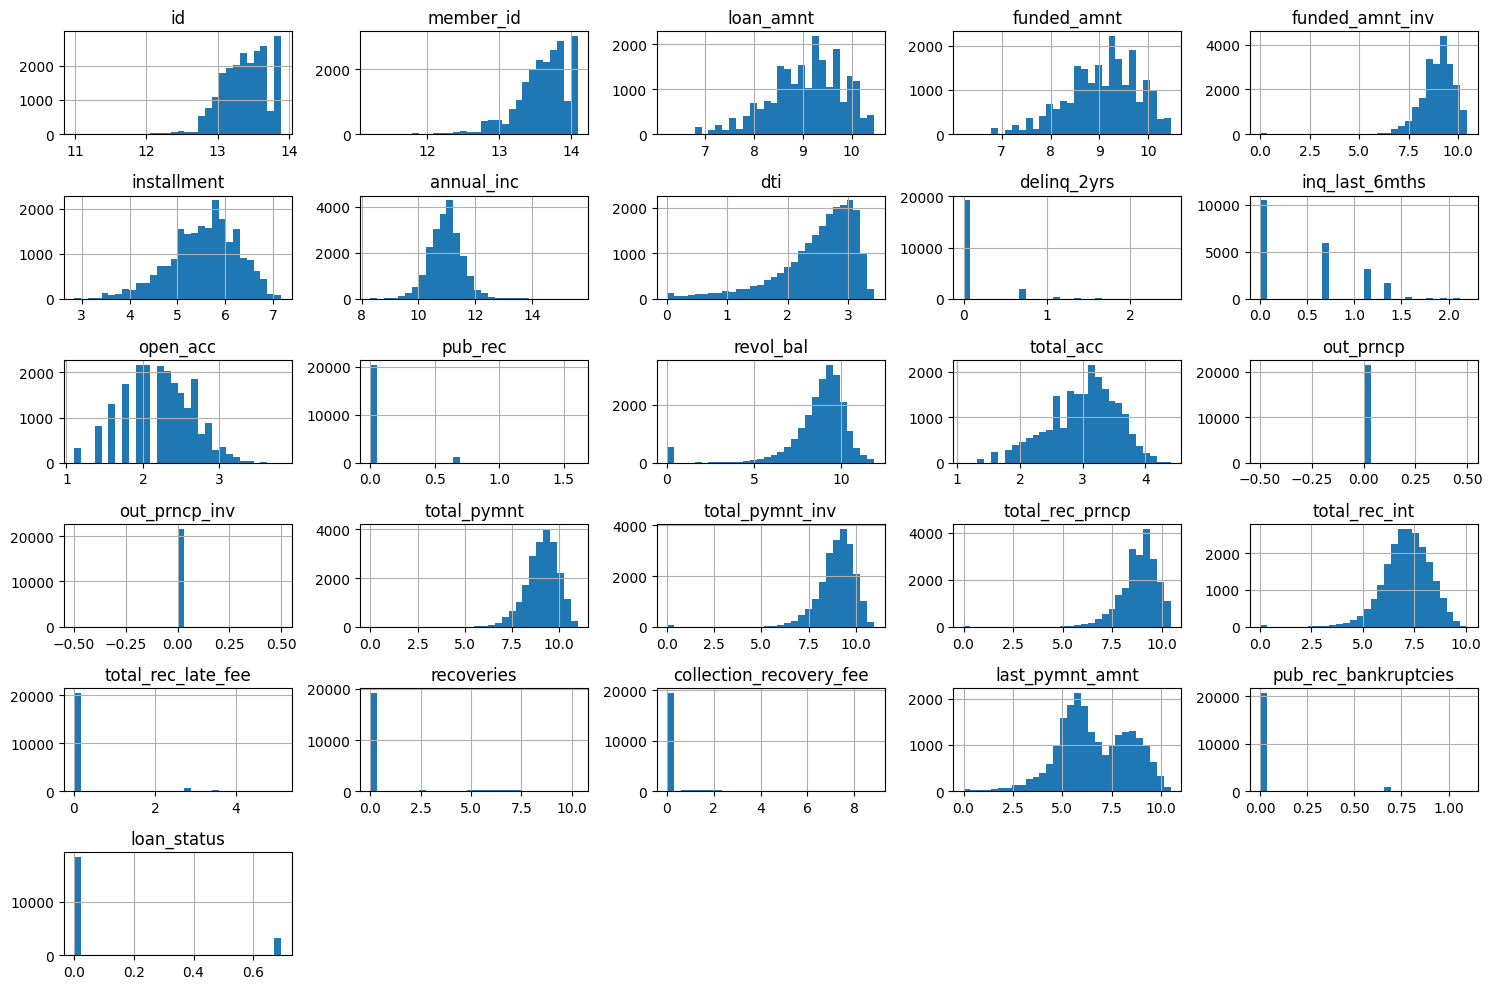

Dataset shape: 21602 rows, 45 columns


In [13]:
import matplotlib.pyplot as plt

df_train_temp.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()
print(f"Dataset shape: {df_train_temp.shape[0]} rows, {df_train_temp.shape[1]} columns")

In [14]:
# Dropping columns with high cardniality
cat_cols = df_train_temp.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    print(f"{col}: {df_train_temp[col].nunique()} unique values")
high_card_cols = [col for col in cat_cols if df_train_temp[col].nunique() > 100]
print("Dropping these high-cardinality columns:", high_card_cols)

df_train_temp = df_train_temp.drop(columns=high_card_cols)

# Step 4: One-hot encode only categorical columns with possible cardinality
categorical_cols = df_train_temp.select_dtypes(include=['object', 'category']).columns
df_train_temp = pd.get_dummies(df_train_temp, columns=categorical_cols, drop_first=True)
df_train_temp.head()

term: 2 unique values
int_rate: 362 unique values
grade: 7 unique values
sub_grade: 35 unique values
emp_title: 16653 unique values
emp_length: 11 unique values
home_ownership: 5 unique values
verification_status: 3 unique values
issue_d: 55 unique values
url: 21602 unique values
desc: 14440 unique values
purpose: 14 unique values
title: 11428 unique values
zip_code: 783 unique values
addr_state: 50 unique values
earliest_cr_line: 500 unique values
revol_util: 1043 unique values
last_pymnt_d: 101 unique values
last_credit_pull_d: 102 unique values
Dropping these high-cardinality columns: ['int_rate', 'emp_title', 'url', 'desc', 'title', 'zip_code', 'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,13.502100,13.739679,9.392745,9.392745,9.392745,6.031790,11.695255,2.559550,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,12.812419,12.846573,7.783641,7.783641,5.500442,4.393955,10.434145,2.142416,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,False
2,13.245946,13.497856,8.188967,8.188967,8.188967,4.847959,11.350418,1.373716,0.693147,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,13.642386,13.865768,9.798183,9.798183,9.798183,6.416324,11.512935,2.964757,0.000000,0.693147,...,False,False,False,False,False,False,False,False,False,False
4,13.316034,13.565114,9.680406,9.289706,9.289706,5.370126,11.643962,3.063858,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


In [15]:
print(len(df_train_temp.columns))
print(df_train_temp['out_prncp'].isnull().sum())
print(df_train_temp['out_prncp'].nunique()) # 1 all the values in this column are the same.
print(df_train_temp['out_prncp_inv'].isnull().sum())
print(df_train_temp['out_prncp_inv'].nunique()) # 1 all the values in this column are the same.
# its variance is zero --> then correlation is NAN

199
0
1
0
1


In [16]:
# Step 5: Calculate correlation
# Remove columns with std=0 --> as correlation will be NAN
df_train_temp = df_train_temp.loc[:, df_train_temp.std() != 0]
# You have NaN correlations for: 
# That means these columns have all null values or constant values (like all zeros), which causes correlation to fail.
correlation = df_train_temp.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)
print(correlation)
print(len(df_train_temp.columns))

loan_status                1.000000
recoveries                 0.810684
collection_recovery_fee    0.631126
total_rec_late_fee         0.186517
term_ 60 months            0.169807
                             ...   
annual_inc                -0.073518
last_pymnt_amnt           -0.305837
total_pymnt_inv           -0.310821
total_pymnt               -0.355139
total_rec_prncp           -0.488659
Name: loan_status, Length: 197, dtype: float64
197


In [17]:
import numpy as np  # add this at the top
# Step 2: Thresholds
corr_threshold = 0.1
nan_threshold = 0.3
inter_corr_threshold = 0.9

# Step 3: Filter features based on correlation with target
corr_filtered = correlation[abs(correlation) >= corr_threshold]
final_cols = corr_filtered.index.tolist()

# Step 4: Drop target if still there
if 'loan_status' in final_cols:
    final_cols.remove('loan_status')

# Step 6: Remove highly correlated features with each other
# Compute inter-feature correlation
inter_corr_matrix = df_train_temp[final_cols].corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = inter_corr_matrix.where(
~np.tril(np.ones(inter_corr_matrix.shape)).astype(bool)
)

# Drop columns with high correlation
to_drop = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > inter_corr_threshold)
]

# Final features
final_cols = [col for col in final_cols if col not in to_drop]

# Step 7: Final DataFrame
df_selected = df_train_temp[final_cols + ['loan_status']]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   recoveries               21602 non-null  float64
 1   collection_recovery_fee  21602 non-null  float64
 2   total_rec_late_fee       21602 non-null  float64
 3   term_ 60 months          21602 non-null  bool   
 4   last_pymnt_amnt          21602 non-null  float64
 5   total_pymnt_inv          21602 non-null  float64
 6   total_pymnt              21602 non-null  float64
 7   loan_status              21602 non-null  float64
dtypes: bool(1), float64(7)
memory usage: 1.2 MB


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [18]:
print(f"Dataset shape: {df_selected.shape[0]} rows, {df_selected.shape[1]} columns")
print(f"Number of rows with at least one null value: {df_selected.isnull().sum()}")

Dataset shape: 21602 rows, 8 columns
Number of rows with at least one null value: recoveries                 0
collection_recovery_fee    0
total_rec_late_fee         0
term_ 60 months            0
last_pymnt_amnt            0
total_pymnt_inv            0
total_pymnt                0
loan_status                0
dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler
def preprocess_data(df, scaler=None, fit_scaler=False):
    # df.info()
    df = df.drop_duplicates()

    # Fill numeric NaNs
    for col in df.select_dtypes(include='number'):
        df[col] = df[col].fillna(df[col].median())
        
    # Fill categorical NaNs
    for col in df.select_dtypes(include=['object', 'category']):
        df[col] = df[col].fillna(df[col].mode()[0])

    # One-hot encode
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    df = df[final_cols + ['loan_status']]
    
    # # Standardize numeric columns
    # num_cols = df.select_dtypes(include='number').columns.drop('loan_status')
    # if fit_scaler:
    #     scaler = StandardScaler()
    #     df[num_cols] = scaler.fit_transform(df[num_cols])
    # else:
    #     df[num_cols] = scaler.transform(df[num_cols])

    # Convert all boolean columns to numeric (0 and 1)
    df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

    df.info()
    return df, scaler

In [20]:
df_train_preprocessed, scaler=preprocess_data(df_train, fit_scaler=True)
# df_val_preprocessed, _ =preprocess_data(df_val, scaler)
df_test_preprocessed, _ =preprocess_data(df_test, scaler)
# Separate features (X) and target (y) for each dataset
X_train = df_train_preprocessed.drop('loan_status', axis=1)
y_train = df_train_preprocessed['loan_status']

# X_val = df_val_preprocessed.drop('loan_status', axis=1)
# y_val = df_val_preprocessed['loan_status']
X_test = df_test_preprocessed.drop('loan_status', axis=1)
y_test = df_test_preprocessed['loan_status']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21602 entries, 0 to 21601
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   recoveries               21602 non-null  float64
 1   collection_recovery_fee  21602 non-null  float64
 2   total_rec_late_fee       21602 non-null  float64
 3   term_ 60 months          21602 non-null  int64  
 4   last_pymnt_amnt          21602 non-null  float64
 5   total_pymnt_inv          21602 non-null  float64
 6   total_pymnt              21602 non-null  float64
 7   loan_status              21602 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5401 entries, 0 to 5400
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   recoveries               5401 non-null   float64
 1   collection_recovery_fee  5401

### helpers

In [33]:
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import validation_curve, cross_validate

def get_bias_variance(estimator, X_train, y_train, X_test, y_test):
    # Fit the model
    estimator.fit(X_train, y_train)
    
    # Calculate bias and variance
    mse, bias, var = bias_variance_decomp(
        estimator, 
        X_train=X_train, 
        y_train=y_train, 
        X_test=X_test, 
        y_test=y_test, 
        loss='0-1_loss',  # For classification
        random_seed=42
    )
    
    print(f"\nBias-Variance Analysis:")
    print(f"● mean square error: {mse:.7f}")
    print(f"● bias: {bias:.7f}")
    print(f"● var: {var:.7f}")
    print(f"● Estimated Eout: {mse:.7f}")
    
    return mse, bias, var

In [86]:
def plot_with_fill_between(x, train_scores, val_scores, xlabel, title, log_scale=False,y_padding=0.1):
    """Helper function to plot with fill_between"""
    # np.mean(..., axis=1) averages scores across cross-validation folds
    # semilogx uses log scale for x-axis (appropriate for C parameter)
    train_mean = np.mean(train_scores, axis=1) if train_scores.ndim > 1 else train_scores
    train_std = np.std(train_scores, axis=1) if train_scores.ndim > 1 else 0
    val_mean = np.mean(val_scores, axis=1) if val_scores.ndim > 1 else val_scores
    val_std = np.std(val_scores, axis=1) if val_scores.ndim > 1 else 0
    
    plt.figure(figsize=(8, 5))
    if log_scale:
        plt.semilogx(x, train_mean, 'o-', color="blue", label="Training score")
        plt.semilogx(x, val_mean, 'o-', color="red", label="Validation score")
    else:
        plt.plot(x, train_mean, 'o-', color="blue", label="Training score")
        plt.plot(x, val_mean, 'o-', color="red", label="Validation score")
    
    plt.fill_between(x, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
    plt.fill_between(x, val_mean - val_std, val_mean + val_std, alpha=0.2, color="red")

    # Calculate dynamic y-axis limits with padding
    y_min = min(np.min(train_mean - train_std), np.min(val_mean - val_std)) - y_padding
    y_max = max(np.max(train_mean + train_std), np.max(val_mean + val_std)) + y_padding
    plt.ylim(max(0, y_min), min(1.0, y_max))  # Keep between 0 and 1 for accuracy
    
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    plt.title(title, pad=20)
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()


## Trial 4: AdaBoost

In [80]:
import warnings
warnings.filterwarnings("ignore")  # Add this at the beginning of your script

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X_train_cpu = X_train.copy()
y_train_cpu = y_train.copy()
# Base estimator for AdaBoost
base_estimator = DecisionTreeClassifier()

f1_scorer = make_scorer(f1_score, average='weighted')
class_counts = np.bincount(y_train)
n_samples = len(y_train)
n_classes = len(class_counts)
class_weights = n_samples / (n_classes * class_counts)
weights_dict = {i: class_weights[i] for i in range(n_classes)}

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [1, 2, 3],
    'base_estimator__class_weight': [None, 'balanced', weights_dict],
    'algorithm': ['SAMME','SAMME.R']
}

# Initialize AdaBoost classifier
ada = AdaBoostClassifier(estimator=base_estimator)

# Grid Search
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid,
                           cv=3, scoring=f1_scorer, n_jobs=-1, verbose=2)

# Fit
grid_search.fit(X_train_cpu, y_train_cpu)

# Results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV F1 Score: {:.4f}".format(grid_search.best_score_))

# Predict
y_pred = grid_search.best_estimator_.predict(X_test)

# Metrics
print("Accuracy on Validation Data:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=   1.6s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=200; total time=   3.2s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.1, n_estimators=200; total time=   3.3s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=1, n_estimators=100; total time=   1.6s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=1, n_estimators=200; total time=   3.1s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=2, learning_rate=0.01, n_estimators=100

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=   1.6s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   0.8s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   0.8s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   0.8s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   1.6s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.1, n_estimators=200;

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=200; total time=   3.2s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   1.6s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.1, n_estimators=200; total time=   3.4s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=1, n_estimators=100; total time=   2.0s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=1, n_estimators=200; total time=   3.1s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=2, learning_rate=0.01, n_estimators=100;

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=   1.6s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=200; total time=   3.2s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   1.6s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=1, n_estimators=50; total time=   0.8s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=1, n_estimators=50; total time=   1.0s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=1, n_estimators=50; total time=   1.2s
[CV] END algorithm=SAMME, base_estimator__class_weight=None, base_estimator__max_depth=1, learning_rate=1, n_estimators=100; total 

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba


[CV] END algorithm=SAMME, base_estimator__class_weight=balanced, base_estimator__max_depth=3, learning_rate=0.1, n_estimators=200; total time=   0.5s
[CV] END algorithm=SAMME, base_estimator__class_weight=balanced, base_estimator__max_depth=3, learning_rate=1, n_estimators=50; total time=   0.2s
[CV] END algorithm=SAMME, base_estimator__class_weight=balanced, base_estimator__max_depth=3, learning_rate=1, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, base_estimator__class_weight=balanced, base_estimator__max_depth=3, learning_rate=1, n_estimators=100; total time=   0.2s
[CV] END algorithm=SAMME, base_estimator__class_weight=balanced, base_estimator__max_depth=3, learning_rate=1, n_estimators=200; total time=   0.2s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   0.9s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.586373507

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba


[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=2, learning_rate=0.1, n_estimators=200; total time=   5.4s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=3, learning_rate=0.01, n_estimators=50; total time=   1.7s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=3, learning_rate=0.01, n_estimators=100; total time=   3.4s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=3, learning_rate=0.1, n_estimators=50; total time=   0.6s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=3, learning_rate=0.1, n_estimators=50; total time=   0.5s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba


[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=2, learning_rate=1, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=2, learning_rate=1, n_estimators=100; total time=   0.1s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=2, learning_rate=1, n_estimators=100; total time=   2.8s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=3, learning_rate=0.01, n_estimators=50; total time=   1.7s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=3, learning_rate=0.01, n_estimators=100; total time=   3.4s
[CV] END algorithm=SAMME, base_estimator__class_weight={0: 0.586

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

Best Hyperparameters: {'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
Best CV F1 Score: 0.9749
Accuracy on Validation Data: 0.9746343269764859
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4606
           1       0.95      0.87      0.91       795

    accuracy                           0.97      5401
   macro avg       0.97      0.93      0.95      5401
weighted avg       0.97      0.97      0.97      5401



In [81]:
get_bias_variance(grid_search.best_estimator_, X_train.values , y_train.values , X_test.values , y_test.values )


[CV] END algorithm=SAMME.R, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   1.1s
[CV] END algorithm=SAMME.R, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=50; total time=   1.1s
[CV] END algorithm=SAMME.R, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=   2.2s
[CV] END algorithm=SAMME.R, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=100; total time=   2.2s
[CV] END algorithm=SAMME.R, base_estimator__class_weight={0: 0.5863735070575461, 1: 3.3944060339409177}, base_estimator__max_depth=1, learning_rate=0.01, n_estimators=200; total time=   4.3s
[CV] END algorithm=SAMME.R, base_estimator__cl

(0.025379559340862806, 0.023329013145713756, 0.006334937974449176)

### Heatmaps between hyperparameters

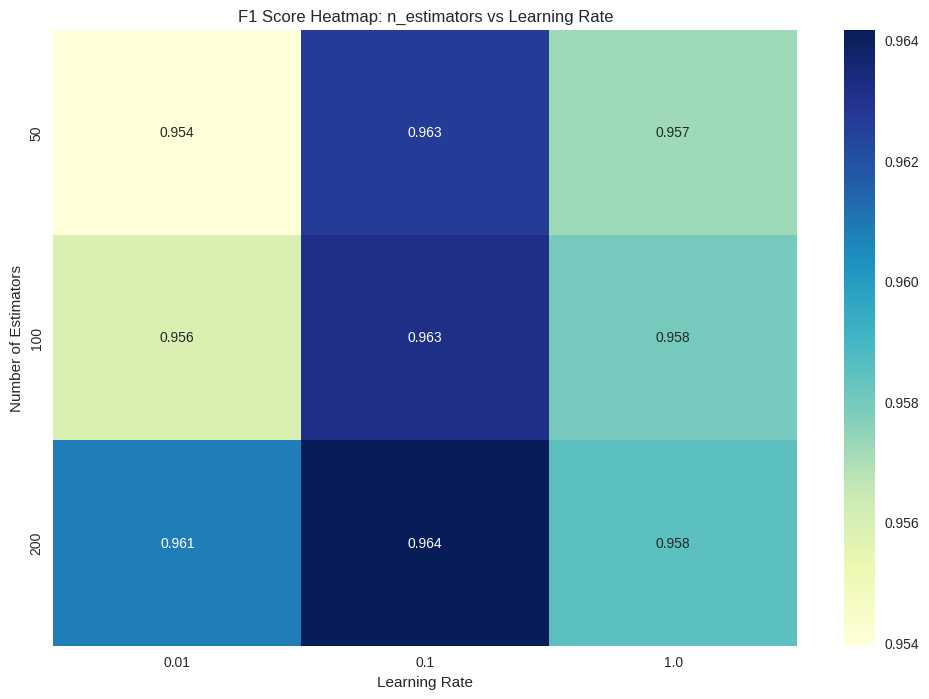

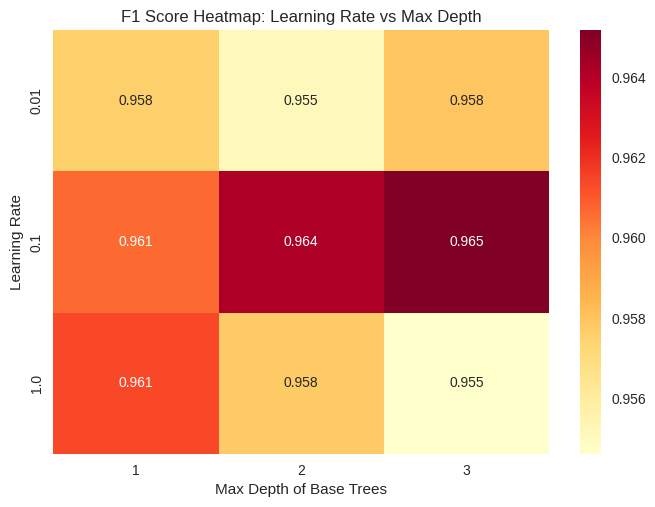

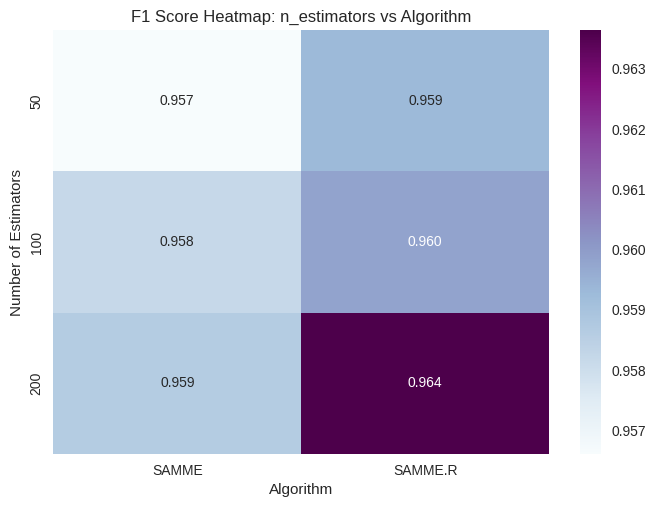

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First ensure you have results in the correct format
results = grid_search.cv_results_
all_results = []
for i in range(len(results['params'])):
    result_dict = {
        'param_n_estimators': results['params'][i]['n_estimators'],
        'param_learning_rate': results['params'][i]['learning_rate'],
        'param_max_depth': results['params'][i]['base_estimator__max_depth'],
        'param_class_weight': str(results['params'][i]['base_estimator__class_weight']),
        'param_algorithm': str(results['params'][i]['algorithm']),
        'mean_test_score': results['mean_test_score'][i]
    }
    all_results.append(result_dict)

# Convert results to DataFrame
results_df = pd.DataFrame(all_results)

# Now create the heatmaps
plt.figure(figsize=(12, 8))

# Heatmap 1: n_estimators vs learning_rate
try:
    heatmap1 = results_df.pivot_table(
        index='param_n_estimators', 
        columns='param_learning_rate', 
        values='mean_test_score'
    )
    sns.heatmap(heatmap1, annot=True, cmap='YlGnBu', fmt=".3f")
    plt.title("F1 Score Heatmap: n_estimators vs Learning Rate")
    plt.ylabel("Number of Estimators")
    plt.xlabel("Learning Rate")
    plt.show()
except Exception as e:
    print(f"Could not create n_estimators vs learning_rate heatmap: {e}")

# Heatmap 2: learning_rate vs max_depth
try:
    heatmap2 = results_df.pivot_table(
        index='param_learning_rate', 
        columns='param_max_depth', 
        values='mean_test_score'
    )
    sns.heatmap(heatmap2, annot=True, cmap='YlOrRd', fmt=".3f")
    plt.title("F1 Score Heatmap: Learning Rate vs Max Depth")
    plt.ylabel("Learning Rate")
    plt.xlabel("Max Depth of Base Trees")
    plt.show()
except Exception as e:
    print(f"Could not create learning_rate vs max_depth heatmap: {e}")

# Heatmap 3: n_estimators vs algorithm
try:
    heatmap3 = results_df.pivot_table(
        index='param_n_estimators', 
        columns='param_algorithm', 
        values='mean_test_score'
    )
    sns.heatmap(heatmap3, annot=True, cmap='BuPu', fmt=".3f")
    plt.title("F1 Score Heatmap: n_estimators vs Algorithm")
    plt.ylabel("Number of Estimators")
    plt.xlabel("Algorithm")
    plt.show()
except Exception as e:
    print(f"Could not create n_estimators vs class_weight heatmap: {e}")

### Plot Ein and Eval vs. Training Set Size

Size 0.1: Train Error=0.0000, Val Error=0.0329
Size 0.2: Train Error=0.0133, Val Error=0.0259
Size 0.3: Train Error=0.0152, Val Error=0.0266
Size 0.4: Train Error=0.0195, Val Error=0.0238
Size 0.5: Train Error=0.0197, Val Error=0.0250
Size 0.6: Train Error=0.0194, Val Error=0.0234
Size 0.7: Train Error=0.0205, Val Error=0.0248
Size 0.8: Train Error=0.0213, Val Error=0.0238
Size 0.9: Train Error=0.0213, Val Error=0.0245
Size 1.0: Train Error=0.0214, Val Error=0.0252


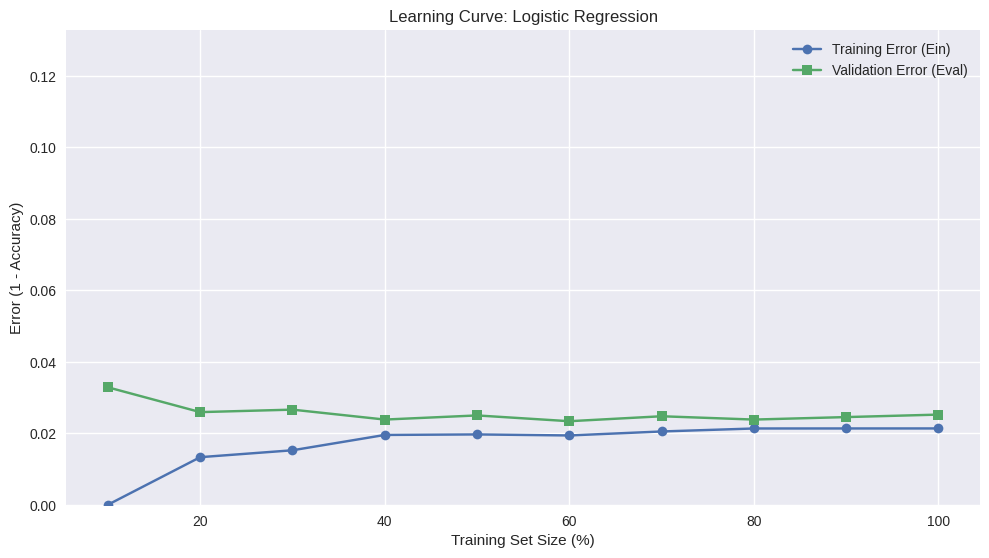

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Store errors
train_sizes = np.linspace(0.1, 1.0, 10)  # 10 equally spaced values between 0.1 and 1.0
ein_list = []
eval_list = []

# Split original training data into training + validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)
# Shuffle training data
X_train_sub = X_train_sub.sample(frac=1, random_state=42)
y_train_sub = y_train_sub.sample(frac=1, random_state=42)
# Initialize base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)

for size in train_sizes:
    # Sample subset
    subset_len = int(len(X_train_sub) * size)
    X_sub = X_train_sub[:subset_len]
    y_sub = y_train_sub[:subset_len]

    # Train AdaBoost model
    model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=100,  # Fixed number of estimators
        learning_rate=0.1,  # Moderate learning rate
        random_state=42
    )
    model.fit(X_sub, y_sub)

    # Training error (Ein)
    y_train_pred = model.predict(X_sub)
    ein = 1 - accuracy_score(y_sub, y_train_pred)
    ein_list.append(ein)

    # Validation error (Eval)
    y_val_pred = model.predict(X_val)
    eval_ = 1 - accuracy_score(y_val, y_val_pred)
    eval_list.append(eval_)
    
    print(f"Size {size:.1f}: Train Error={ein:.4f}, Val Error={eval_:.4f}")

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * 100, ein_list, marker='o', label='Training Error (Ein)')
plt.plot(train_sizes * 100, eval_list, marker='s', label='Validation Error (Eval)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Learning Curve: Logistic Regression')
plt.legend()
# Calculate dynamic y-axis limits
y_min = min(min(ein_list), min(eval_list)) - 0.1  # 5% padding below
y_max = max(max(ein_list), max(eval_list)) + 0.1  # 5% padding above
plt.ylim(max(0, y_min), min(1.0, y_max))  # Keep between 0 and 1
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

### Bias-Variance Tradeoff plot

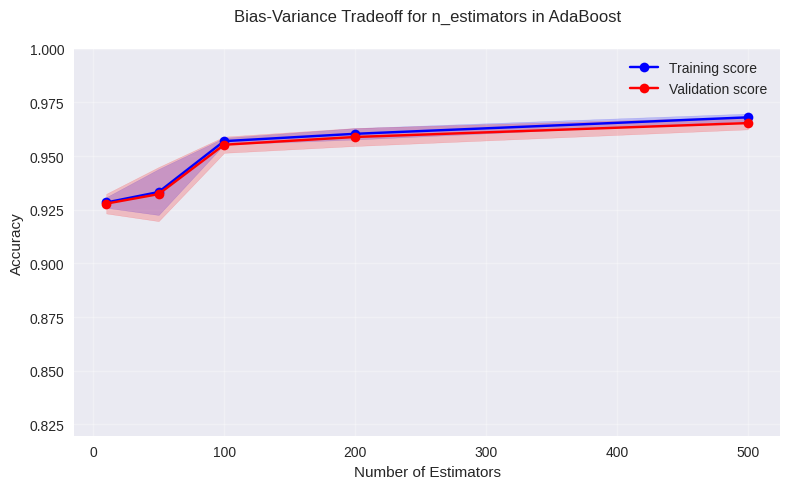

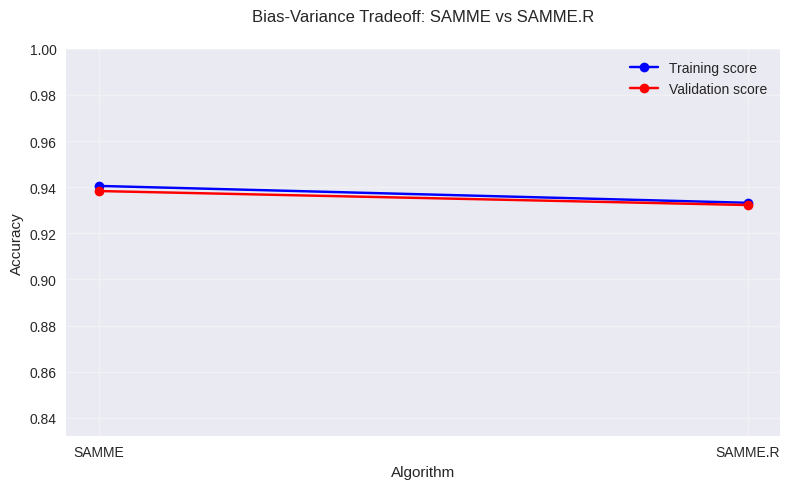

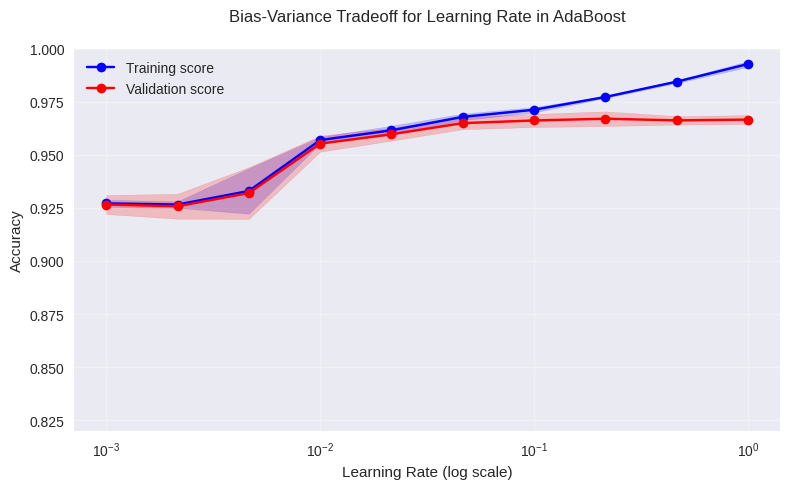

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve, cross_validate
from sklearn.exceptions import ConvergenceWarning
import warnings

plt.style.use('seaborn')

# Base estimator
base_estimator = DecisionTreeClassifier(max_depth=3, class_weight='balanced')

# ****1. Validation Curve for n_estimators****
n_estimators_range = [10, 50, 100, 200, 500]
train_scores, val_scores = validation_curve(
    AdaBoostClassifier(estimator=base_estimator, learning_rate=0.01, random_state=42,algorithm='SAMME.R'),
    X_train, y_train,
    param_name="n_estimators", 
    param_range=n_estimators_range,
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1
)

plot_with_fill_between(
    n_estimators_range, train_scores, val_scores,
    xlabel="Number of Estimators",
    title="Bias-Variance Tradeoff for n_estimators in AdaBoost",
    log_scale=False
)
plt.show()

# ****2. Validation Curve for Algorithm Comparison****
algorithms = {
    'SAMME': AdaBoostClassifier(estimator=base_estimator, learning_rate=0.01, algorithm='SAMME', random_state=42),
    'SAMME.R': AdaBoostClassifier(estimator=base_estimator,learning_rate=0.01, algorithm='SAMME.R', random_state=42)
}

train_scores = []
val_scores = []
train_stds = []
val_stds = []

for name, model in algorithms.items():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", ConvergenceWarning)
        cv_results = cross_validate(model, X_train, y_train, cv=5, 
                                  return_train_score=True)
        train_scores.append(np.mean(cv_results['train_score']))
        val_scores.append(np.mean(cv_results['test_score']))
        train_stds.append(np.std(cv_results['train_score']))
        val_stds.append(np.std(cv_results['test_score']))

# Convert to arrays for plotting
x_pos = np.arange(len(algorithms))
train_scores = np.array(train_scores)
val_scores = np.array(val_scores)

plot_with_fill_between(
    x_pos, train_scores, val_scores,
    xlabel="Algorithm",
    title="Bias-Variance Tradeoff: SAMME vs SAMME.R",
    log_scale=False
)
plt.xticks(x_pos, list(algorithms.keys()))
plt.show()

# ****3. Validation Curve for Learning Rate****
learning_rate_range = np.logspace(-3, 0, 10)  # 0.001 to 1.0
train_scores, val_scores = validation_curve(
    AdaBoostClassifier(estimator=base_estimator, n_estimators=100, random_state=42, algorithm='SAMME.R'),
    X_train, y_train,
    param_name="learning_rate", 
    param_range=learning_rate_range,
    cv=5, 
    scoring="accuracy", 
    n_jobs=-1
)

plot_with_fill_between(
    learning_rate_range, train_scores, val_scores,
    xlabel="Learning Rate (log scale)",
    title="Bias-Variance Tradeoff for Learning Rate in AdaBoost",
    log_scale=True
)
plt.show()